# Artificial Intelligence UE
## Assignment 3 - Game Playing

<div class="alert alert-danger"">
    <strong>Deadline: </strong> 25.11.2024, 12:00 (noon)
</div>

In this assignment you are looking at game playing - more precisely, at the Minimax algorithm, Alpha-Beta pruning and Q-Learning. 

The algorithms have been explained in the lecture (VO) and we gave you some additional information in the exercise (UE). Please refer to the lecture slides (VO) for the pseudo algorithms and the exercise slides (UE) for additional hints.

<div class="alert alert-warning">

<p><strong>Automatic Grading:</strong></p>
<ul>
<li>Replace the placeholders <code># YOUR CODE HERE</code>, <code>raise NotImplementedError()</code> with your code.</li>
<li>Do not rename any of the already existing variables (this might lead to hidden tests failing / not working).</li>
<li>Do not delete or add cells.</li>
<li>Hint: Once you've completed your implementation, if you're unsure whether any unintended changes were made to the original notebook, create a fresh copy of the provided notebook. Then, transfer your implementations to the new notebook before submitting.</li>
</ul>

<p><strong>Submission:</strong> Upload the notebook containing your implementation, and change its name s.t. it contains "a3" and your student ID: </p>

    a3_<k/vk + 8 digits>.ipynb ; e.g., a3_01234567.ipynb



<p><strong>Practical hints:</strong></p>
<ul>
<li>if you want a number smaller than all others, you may use <code>float('-Inf')</code></li>
<li>if you want a number larger than all others, you may use <code>float('Inf')</code></li>
</ul>
</div>


In [1]:
# import stuff
from pig_lite.game.base import Game, Node
from pig_lite.environment.base import Environment, Outcome
from pig_lite.instance_generation.problem_factory import ProblemFactory

import math
import random
import numpy as np

## Small Intro into the World of TicTacToe

<div class="alert alert-info">

<p><strong>TicTacToe Visualisation</strong></p>
If you want to see a nicer visualization of your game tree and not just a textual description of game nodes, make sure to install the following packages within your <code>conda</code> environment:
<ul>
    <li>First, activate your environment: <code>conda activate ai2024</code></li>
    <li><code>conda install graphviz</code></li>
    <li><code>conda install networkx</code></li>
    <li><code>conda install pydot</code></li>
</ul>


</div>

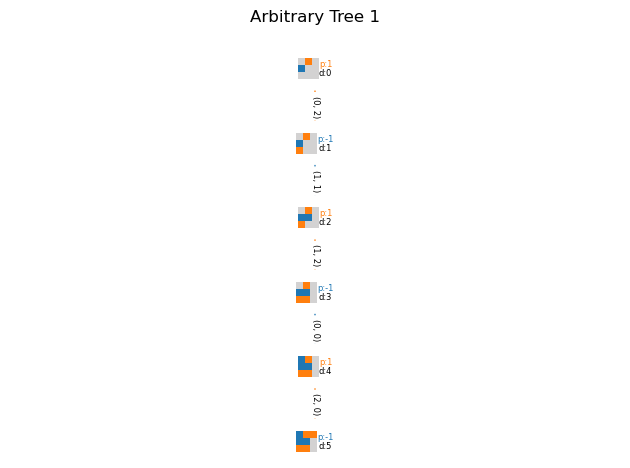

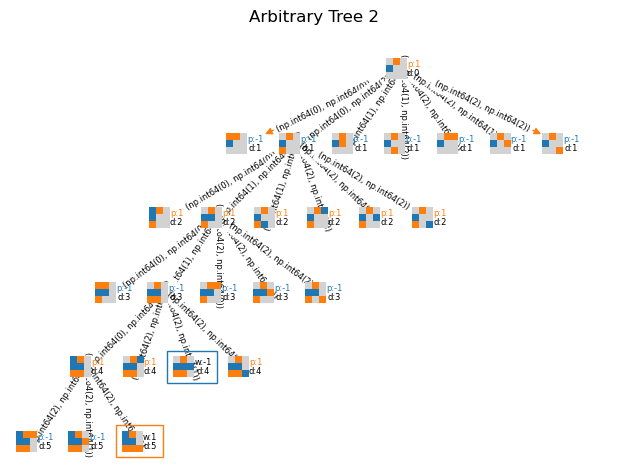

In [2]:
# you can generate a new game board of TicTacToe as follows; note that the problem_size here describes the depth of the board in a game tree
rng = np.random.RandomState(seed=123)
game = ProblemFactory().generate_problem('tictactoe', problem_size=3, rng=rng)

# or, you can load an existing one from a .json file like so:
game = ProblemFactory().create_problem_from_json(json_path='boards/game.json')

# if we use Minimax / Alphabeta pruning to derive a move sequence, we can visualise it as follows:
move_sequence = [(-1, (0, 2)), (1, (1, 1)), (-1, (1, 2)), (1, (0, 0)), (-1, (2, 0))] # arbitrary move sequence for demonstration purposes
game.visualize(move_sequence, show_possible=False, tree_name='Arbitrary Tree 1')
# if we set show_possible to True, the function shows all possible moves from a state in the path
game.visualize(move_sequence, show_possible=True, tree_name='Arbitrary Tree 2')

## Minimax (4 points)

Now, let us implement the Minimax algorithm!

**NOTE**: If multiple paths lead to the same outcome for these algorithms, choose the first expanded / leftmost path.

Game terminated: True, winner is: 1 (1: Max, -1: Min); nr of expanded nodes: 4024
State of the board:


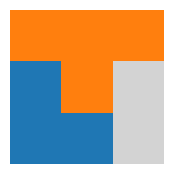

Performed moves: 5


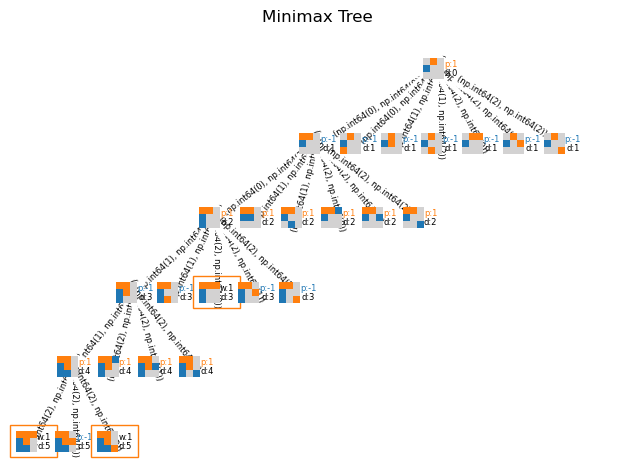

In [3]:
class Minimax():
    def play(self, game: Game):
        """ Starts game playing, and returns found terminal node according to minimax. """
        start = game.get_start_node()
        # 'game.get_max_player()' asks the game how it identifies the MAX player internally
        value, terminal_node = self.minimax(game, start, game.get_max_player())
        return terminal_node

    def minimax(self, game, node, max_player):
        """ Performs minimax algorithm (recursively). """
        # here we check if the current node 'node' is a terminal node
        terminal, winner = game.outcome(node)

        # if it is a terminal node, determine who won, and return
        # a) the utility value (-1, 0, 1)
        # and b) the terminal node itself, to be able to determine the path of moves/plies that led to this terminal node
        if terminal:
            if winner is None:
                return 0, node
            elif winner == max_player:
                return 1, node
            else:
                return -1, node

        # TODO: implement the minimax algorithm recursively here
        if node.player == max_player:
            # you have to remember the best value *and* the best node for the MAX player (TODO: initialise appropriately)
            best_value, best_node = float('-inf'), node
            # YOUR CODE HERE
            # raise NotImplementedError()
            nodes = game.successors(node) # assuming successors are retrieved left to right, then it should get the leftmost path
            for node in nodes:
                best_value_new, best_node_new = self.minimax(game, node, max_player)
                if best_value_new > best_value:
                    best_value, best_node = best_value_new, best_node_new
            
            return best_value, best_node
        else:
            # you have to remember the best value *and* the best node for the MIN player (TODO: initialise appropriately)
            best_value, best_node = float('inf'), node
            # YOUR CODE HERE
            # raise NotImplementedError()
            nodes = game.successors(node)
            for node in nodes:
                best_value_new, best_node_new = self.minimax(game, node, max_player)
                if best_value_new < best_value:
                    best_value, best_node = best_value_new, best_node_new
            return best_value, best_node

game = ProblemFactory().create_problem_from_json(json_path='boards/game.json')
outcome = Minimax().play(game)
minimax_nodes = game.get_number_of_expanded_nodes()

if outcome is not None:
    terminated, winner = game.outcome(outcome)
    print('Game terminated: {}, winner is: {} (1: Max, -1: Min); nr of expanded nodes: {}'.format(terminated, winner, minimax_nodes))
    outcome.pretty_print()
    game.visualize(game.get_move_sequence(outcome), True, 'Minimax Tree')   

### Checks

In [4]:
# test cell, don't edit or delete
# check found path here 
assert(outcome is not None), 'Minimax returned None, something is wrong with the implementation'

In [5]:
# test cell, don't edit or delete
assert(outcome is not None), 'Minimax pruning returned None, something is wrong with the implementation'

In [6]:
# test cell, don't edit or delete
assert(outcome is not None), 'Minimax pruning returned None, something is wrong with the implementation'

In [7]:
# test cell, don't edit or delete
assert(outcome is not None), 'Minimax pruning returned None, something is wrong with the implementation'

In [8]:
# test cell, don't edit or delete
# check found path here 
assert(outcome is not None), 'Minimax pruning returned None, something is wrong with the implementation'

In [9]:
# test cell, don't edit or delete

In [10]:
# test cell, don't edit or delete

## Alpha-Beta Pruning (4 points)

Here, let us implement Alpha-Beta pruning. 

**NOTE**: If multiple paths lead to the same outcome for these algorithms, choose the first expanded / leftmost path.

Game terminated: True, winner is: 1 (1: Max, -1: Min); nr of expanded nodes: 266
State of the board:


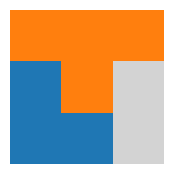

Performed moves: 5


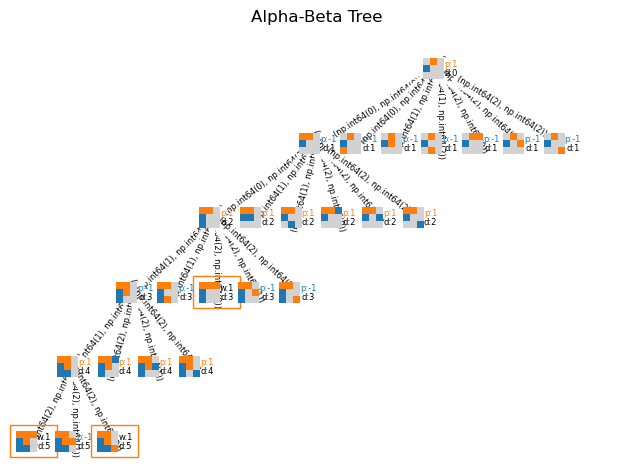

In [11]:
class AlphaBeta(object):
    def play(self, game: Game):
        """ Starts game playing, and returns found terminal node according to alpha-beta pruning. """
        start = game.get_start_node()
        alpha = float('-Inf')
        beta = float('Inf')
        value, terminal_node = self.alphabeta(game, start, alpha, beta, game.get_max_player())
        return terminal_node

    def alphabeta(self, game, node, alpha, beta, max_player):
        """ Performs alpha-beta pruning algorithm (recursively). """
        # here we check if the current node 'node' is a terminal node
        terminal, winner = game.outcome(node)
        # if it is a terminal node, determine who won, and return
        if terminal:
            if winner is None:
                return 0, node
            elif winner == max_player:
                return 1, node
            else:
                return -1, node

        # TODO: implement the alpha-beta pruning algorithm recursively here
        # the structure should be almost the same as for minimax
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        if node.player == max_player:
            best_value, best_node = float('-inf'), node
            nodes = game.successors(node) # assuming successors are retrieved left to right, then it should get the leftmost path
            for node in nodes:
                best_value_new, best_node_new = self.alphabeta(game, node, alpha, beta, max_player)
                if best_value_new > best_value:
                    best_value, best_node = best_value_new, best_node_new
                    alpha = max(alpha, best_value)
                if best_value >= beta: # v ≥ β
                    break
            
            return best_value, best_node
        else:
            best_value, best_node = float('inf'), node
            nodes = game.successors(node)
            for node in nodes:
                best_value_new, best_node_new = self.alphabeta(game, node, alpha, beta, max_player)
                if best_value_new < best_value:
                    best_value, best_node = best_value_new, best_node_new
                    beta = min(beta, best_value)
                if best_value <= alpha: # v ≤ α
                    break
                    
            return best_value, best_node
        

game = ProblemFactory().create_problem_from_json(json_path='boards/game.json')
outcome = AlphaBeta().play(game)
alphabeta_nodes = game.get_number_of_expanded_nodes()

if outcome is not None:
    terminated, winner = game.outcome(outcome)
    print('Game terminated: {}, winner is: {} (1: Max, -1: Min); nr of expanded nodes: {}'.format(terminated, winner, alphabeta_nodes))
    outcome.pretty_print()
    game.visualize(game.get_move_sequence(outcome), True, 'Alpha-Beta Tree')   

### Alpha-Beta Pruning Checks

In [12]:
# test cell, don't edit or delete
# check found path here 
assert(outcome is not None), 'Alpha-beta pruning returned None, something is wrong with the implementation'

In [13]:
# test cell, don't edit or delete

In [14]:
# test cell, don't edit or delete

In [15]:
# test cell, don't edit or delete

In [16]:
# test cell, don't edit or delete
# check expanded nodes here (whether we actually save something compared to minimax)
assert(alphabeta_nodes < minimax_nodes), 'Alpha-beta pruning took more node expansions than minimax - something must be off here...'

In [17]:
# test cell, don't edit or delete

In [18]:
# test cell, don't edit or delete

## Small Intro into the Gridworld

<div class="alert alert-info">
For Q-Learing, we require another new problem type - we here look at a stochastic gridworld.
</div>

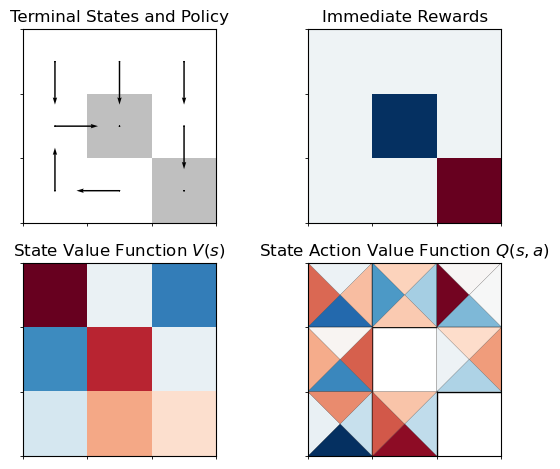

In [19]:
# you can generate a new gridworld as follows
rng = np.random.RandomState(seed=123)
env = ProblemFactory().generate_problem('gridworld', problem_size=3, rng=rng)

# or, you can load an existing one from a .json file like so:
env_json = ProblemFactory().create_problem_from_json(json_path='boards/environment.json')

# if we use Q-Learning to learn the Q-function, we can visualise its results as follows:
rand_policy = np.array([[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0]])
outcome = Outcome(1, rand_policy, np.random.randn(env.get_n_states()),       # arbitrary outcome for demonstration purposes
                  np.random.randn(env.get_n_states(), env.get_n_actions())) 
env.visualize(outcome)

## Q-Learning (7 points)
   
<strong>Remember: To interact with the (Q-Learning) enviroment, you need</strong>
<ul>
<li><code>state = env.reset()</code> to reset the environment at the start of an episode</li>
<li><code>state, reward, done = env.step(action)</code> to tell the environment that your agent decided to take `action`. The environment then tells you in which state you actually ended up in (<code>state</code>), what the immediate reward was (<code>reward</code>), and whether or not the episode ended (<code>done</code>).</li>
  
</ul>

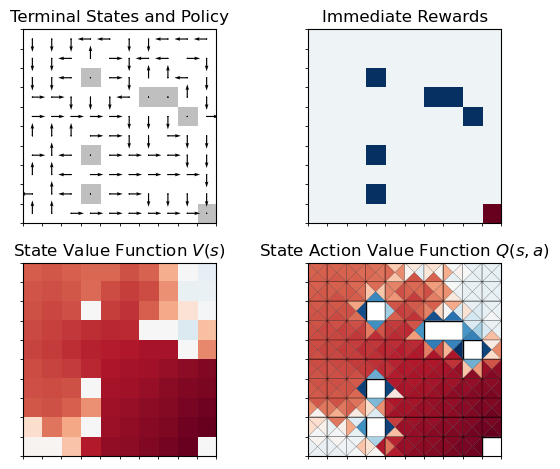

In [20]:
def eps_greedy(rng, qs, epsilon):
    """ Makes an epsilon greedy decision between exploration (trying out a new option) and exploitation (choosing best option so far). """
    if rng.uniform(0, 1) < epsilon:
        # with probability p == epsilon, an action is chosen uniformly at random
        # YOUR CODE HERE
        # raise NotImplementedError()
        action = rng.choice(len(qs))
    else:
        # with probability p == 1 - epsilon, the action having the currently largest q-value estimate is chosen
        # YOUR CODE HERE
        # raise NotImplementedError()
        action = np.argmax(qs)
    
    # this is to avoid errors if there is no implementation yet - you can remove it if you want
    return action

class QLearning():
    def train(self, env: Environment, n_episodes=10000, alpha=0.2):
        """ Performs Q-Learning for given environment. """
        # leave untouched for final submission (for sake of reproducability)
        self.rng = np.random.RandomState(1234)
        self.epsilon = 0.3
        self.gamma = env.get_gamma()

        # initialize the Q-'table'
        Q = np.zeros((env.get_n_states(), env.get_n_actions()))
        
        for episode in range(1, n_episodes + 1):
            # implement q-learning update here: generate an episode, interact with environment with env.reset() and env.step(action)
            # YOUR CODE HERE
            state = env.reset()
            done = False
            while not done:
                action = eps_greedy(self.rng, Q[state], self.epsilon)
                new_state, reward, done = env.step(action)
                Q[state][action] = Q[state][action] + alpha*(reward+self.gamma*max(Q[new_state]) - Q[state][action])
                state = new_state

        # compute a deterministic policy from the Q value function
        policy = np.zeros((env.get_n_states(), env.get_n_actions()), dtype=np.int64)
        policy[np.arange(len(policy)), np.argmax(Q, axis=1)] = 1
        # finally, compute the state value function V here
        # it can be computed easily from Q by taking the action that leads to the max future reward
        V = None
        # YOUR CODE HERE
        # raise NotImplementedError()
        V = np.zeros(env.get_n_states())
        
        for i, state in enumerate(Q):
            max_future_reward = max(state)
            V[i] = max_future_reward
                    
        return Outcome(n_episodes, policy, V=V, Q=Q)


environment = ProblemFactory().create_problem_from_json(json_path='boards/environment.json')
qlearn = QLearning()
outcome = qlearn.train(environment)

if outcome is not None:
    environment.visualize(outcome)

### Q-Learning Checks

In [21]:
# test cell, don't edit or delete
# here we check whether default variables were modified
assert(qlearn.epsilon == 0.3), 'Epsilon was changed for Q-Learning'

In [22]:
# test cell, don't edit or delete
# here we check a few (hidden) test instances for their resulting policy (encoded in a hash-value)
assert(environment.get_policy_hash(outcome) == 'a138e26bebdd61e38fc045f03a37ee77bc3343dc36cb3f1cf415707a9b5e08ad' or
       environment.get_policy_hash(outcome) == '6c8ec07e309222af5c0839f8a6fb58597135356f451dc61c624a1ebea86735fe'), 'algorithm did not find same optimal policy as ours, so there is probably something off'


In [23]:
# test cell, don't edit or delete
# here we check whether eps_greedy was implemented (correctly)
assert(eps_greedy(qlearn.rng, outcome.Q[env.reset()], qlearn.epsilon) != -1), 'eps_greedy does not appear to be implemented (correctly) yet'


In [24]:
# test cell, don't edit or delete

In [25]:
# test cell, don't edit or delete

In [26]:
# test cell, don't edit or delete
# here we check whether V was computed
assert(outcome.V is not None), 'V was not computed (correctly)'

In [27]:
# test cell, don't edit or delete